<a href="https://colab.research.google.com/github/QwejoD/Heart-Disease-Prediction-Using-Machine-Learning/blob/main/Heart_Disease_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Loading all the libraries/ importing dependencies
import pandas as pd 
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from datetime import datetime
import matplotlib.pyplot as plt

##Data collection and preprocessing 

This data set dates from 1988 and consists of four databases: Cleveland, Hungary, Switzerland, and Long Beach V. It contains 76 attributes, including the predicted attribute, but all published experiments refer to using a subset of 14 of them. The "target" field refers to the presence of heart disease in the patient. It is integer valued 0 = no disease and 1 = disease.

In [ ]:
# Loading the data
data = pd.read_csv("/content/heart-dataset.csv")
data.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


**Description of the data**
- `age` - age in years
- `sex` - 1 = male, 0 = female
- `cp` - chest pain type
- `trestbps` - resting blood pressure (in mm Hg on admission to the hospital)
- `chol` - serum cholestoral in mg/dl
- `fbs` - (fasting blood sugar &gt; 120 mg/dl) (1 = true; 0 = false)
- `restecg` - resting electrocardiographic results
- `thalach` - maximum heart rate achieved
- `exang` - exercise induced angina (1 = yes; 0 = no)
- `oldpeak` - ST depression induced by exercise relative to rest
- `slope` - the slope of the peak exercise ST segment
- `ca` - number of major vessels (0-3) colored by flourosopy
- `thal` - thal: 0 = normal; 1 = fixed defect; 2 = reversable defect
- `target` -  0 = no heart disease and 1 = presence of heart disease


In [ ]:
#last 5 rows in the dataset
data.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1
1024,54,1,0,120,188,0,1,113,0,1.4,1,1,3,0


In [ ]:
data.shape

(1025, 14)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


It appears that the data set contains 1025 rows, with 14 columns. All the columns appears to have no missing data. 

In [ ]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

Data has no missing values 

In [ ]:
data.describe()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [ ]:
data['target'].value_counts()

1    526
0    499
Name: target, dtype: int64

526 individuals have heart disease and 499 are normal

1 ----> Defective heart

0 ----> Normal or healthy heart

In [ ]:
# splitting data 

X = data.drop('target', axis=1)
Y = data.target

In [ ]:
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2


In [ ]:
Y

0       0
1       0
2       0
3       0
4       0
       ..
1020    1
1021    0
1022    0
1023    1
1024    0
Name: target, Length: 1025, dtype: int64

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size =0.25, stratify=Y, random_state=2)

In [ ]:
X_train.shape


(768, 13)

In [ ]:
X_test.shape

(257, 13)

In [ ]:
Y_train.shape

(768,)

In [ ]:
Y_test.shape

(257,)

#Model Training

In [ ]:
# Loading the model
 
model = LogisticRegression()

In [ ]:
model.fit(X_train, Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

#Model Evaluation



In [ ]:
# Accuracy 

# Accuracy on training data 
X_train_predictions = model.predict(X_train)
training_accuracy = accuracy_score(X_train_predictions,Y_train)
print(training_accuracy)

0.8671875


In [ ]:
# Accuracy on testing data 
X_test_predictions = model.predict(X_test)
testing_accuracy = accuracy_score(X_test_predictions,Y_test)
print(testing_accuracy)

0.7976653696498055


#Building a predictive system 

In [ ]:
input_data =(55,1,0,140,217,0,1,111,1,5.6,0,0,3)

#converting input data into numpy array

input_data_array = np.asarray(input_data)

In [ ]:
print(input_data_array)

[ 55.    1.    0.  140.  217.    0.    1.  111.    1.    5.6   0.    0.
   3. ]


In [ ]:
# reshape array 

input_data_reshaped = input_data_array.reshape(1,-1)

prediction = model.predict(input_data_reshaped)

print(prediction)

if prediction == 0:
  print("person's has a heart diseased")

else:
  print("person's heart is normal")

[0]
person's has a heart diseased


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


##Further Exploratory Data analysis

array([[<Axes: title={'center': 'age'}>, <Axes: title={'center': 'sex'}>,
        <Axes: title={'center': 'cp'}>,
        <Axes: title={'center': 'trestbps'}>],
       [<Axes: title={'center': 'chol'}>,
        <Axes: title={'center': 'fbs'}>,
        <Axes: title={'center': 'restecg'}>,
        <Axes: title={'center': 'thalach'}>],
       [<Axes: title={'center': 'exang'}>,
        <Axes: title={'center': 'oldpeak'}>,
        <Axes: title={'center': 'slope'}>,
        <Axes: title={'center': 'ca'}>],
       [<Axes: title={'center': 'thal'}>,
        <Axes: title={'center': 'target'}>, <Axes: >, <Axes: >]],
      dtype=object)

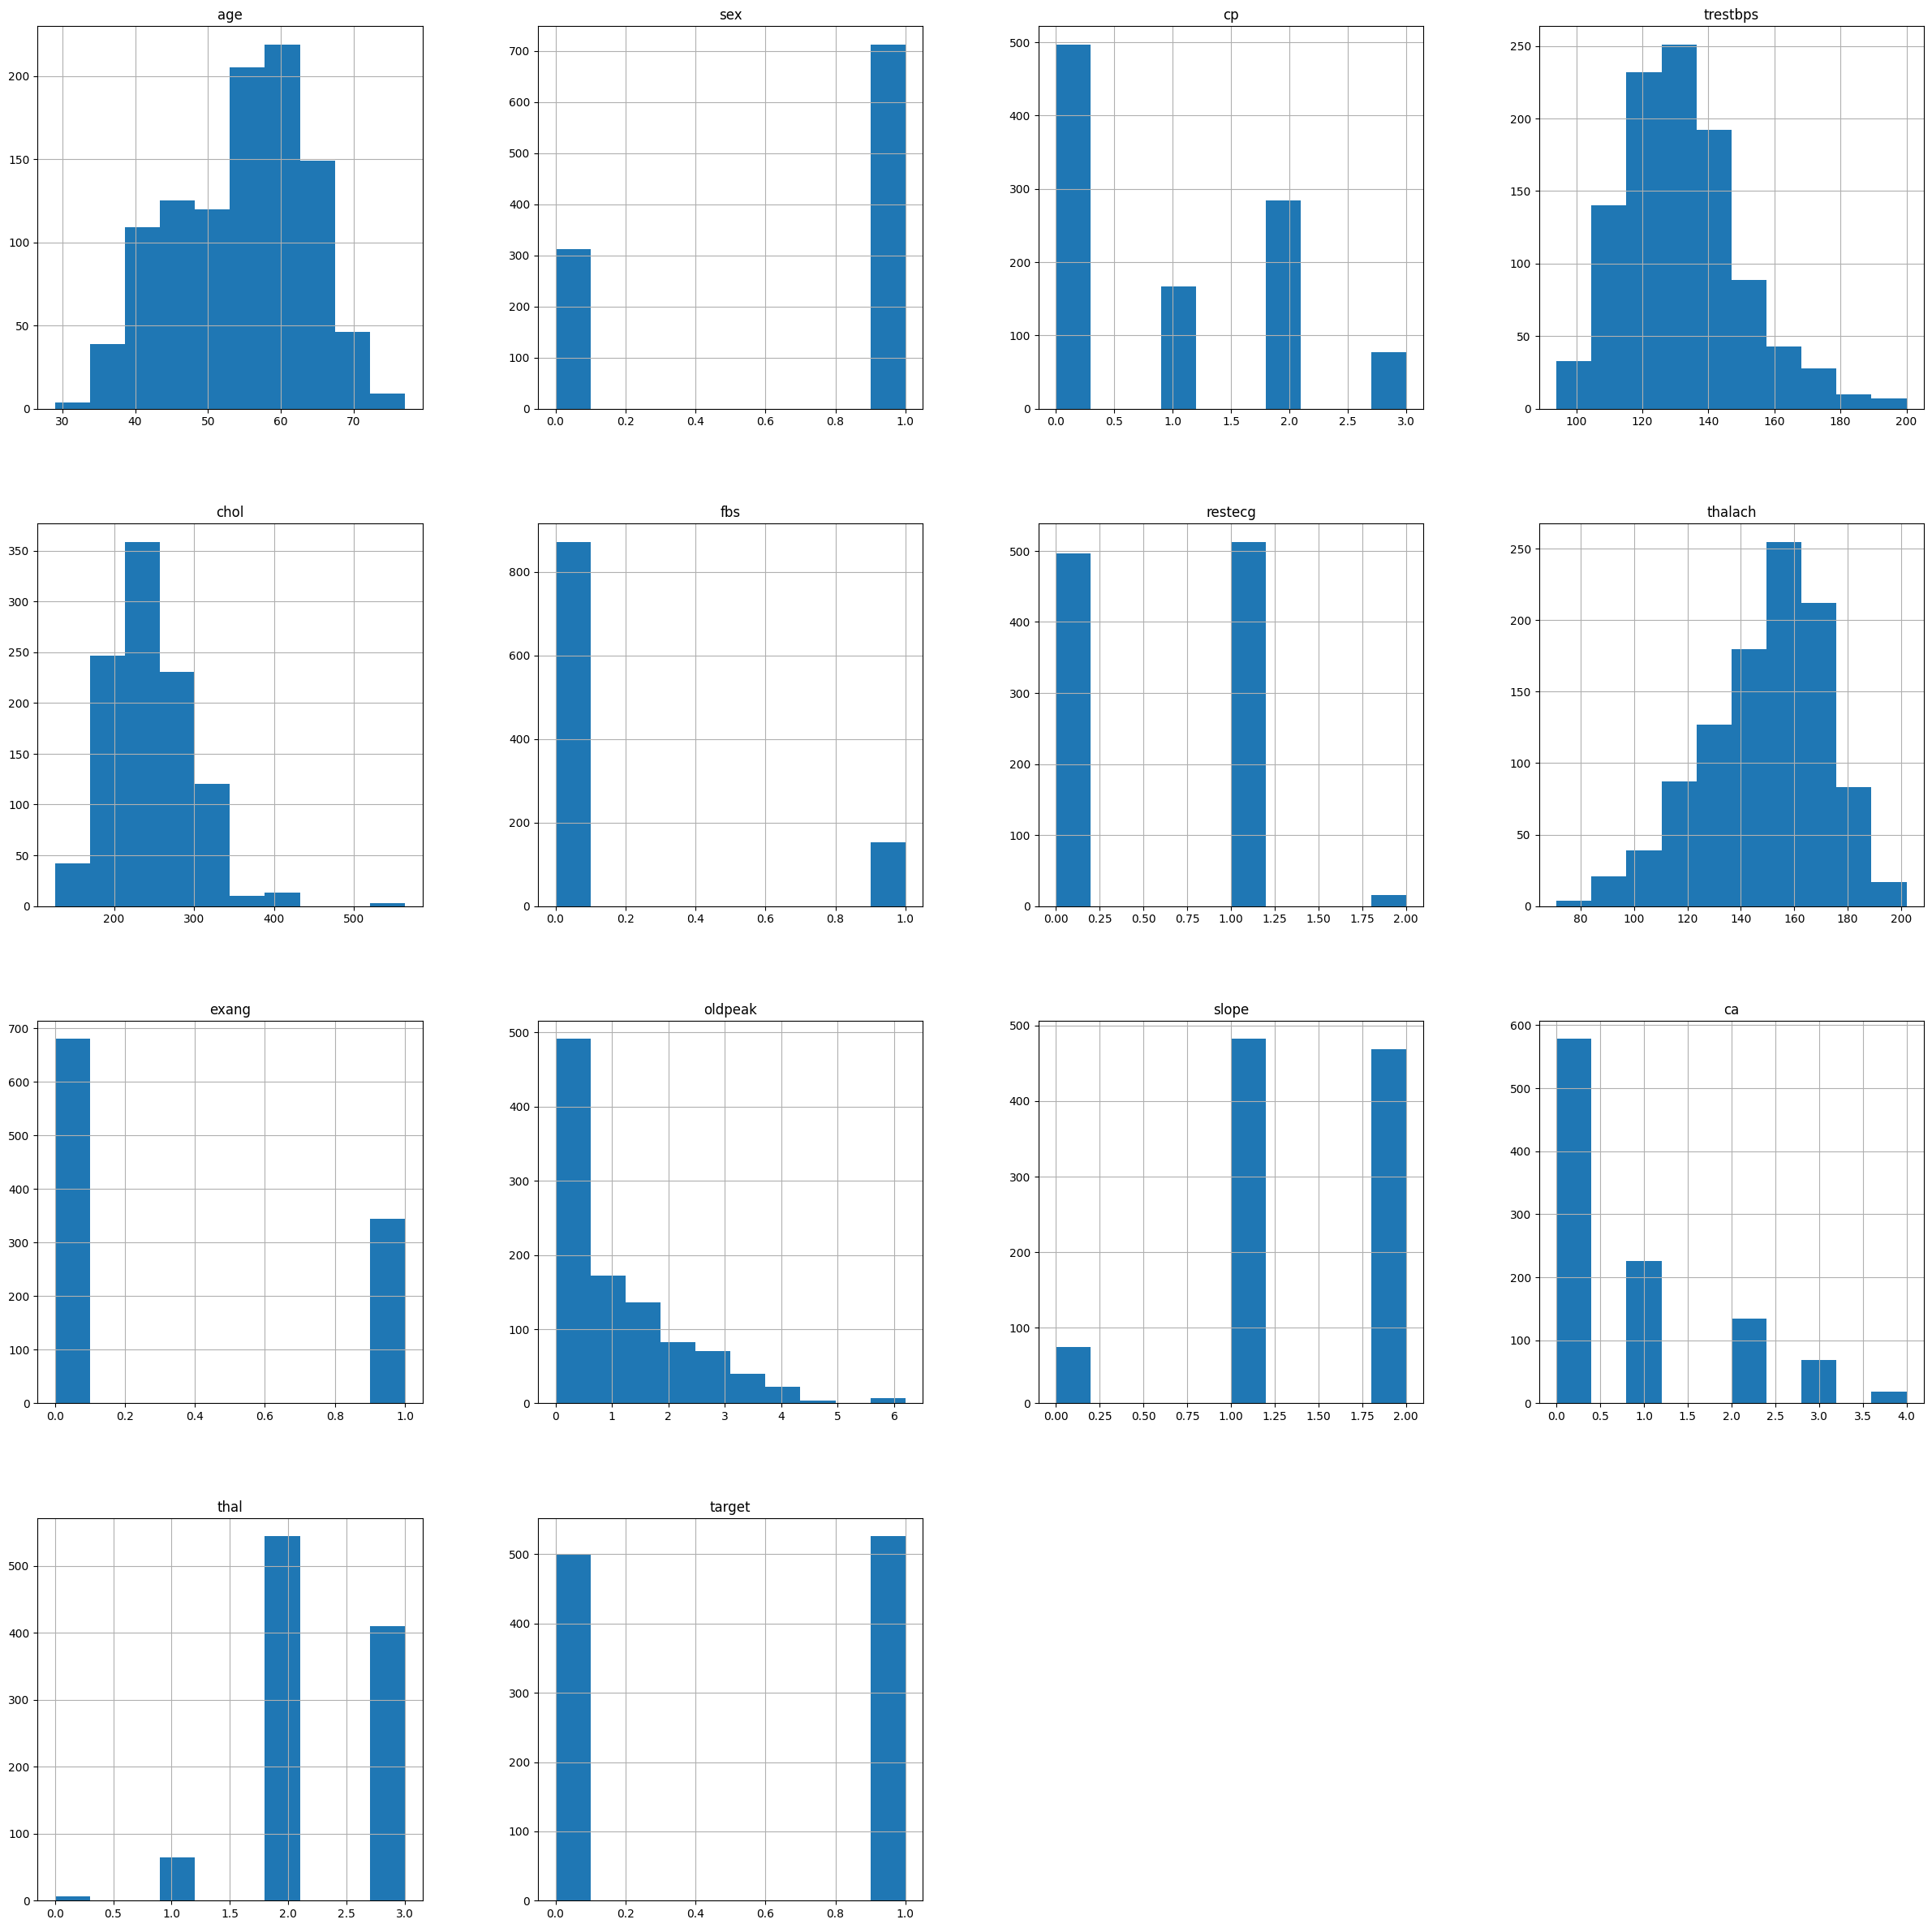

In [ ]:
# Creating a histogram of all features 

data.hist(figsize=(30,30))

#Section2

###Making category types for categorical features


In [ ]:
data["age"] = data["age"].astype("category")
data["sex"] = data["sex"].astype("category")
data["cp"] = data["cp"].astype("category")
data["fbs"] = data["fbs"].astype("category")
data["exang"] = data["exang"].astype("category")
data["ca"] = data["ca"].astype("category")
data["thal"] = data["thal"].astype("category")
data["target"] = data["target"].astype("category")


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   age       1025 non-null   category
 1   sex       1025 non-null   category
 2   cp        1025 non-null   category
 3   trestbps  1025 non-null   int64   
 4   chol      1025 non-null   int64   
 5   fbs       1025 non-null   category
 6   restecg   1025 non-null   int64   
 7   thalach   1025 non-null   int64   
 8   exang     1025 non-null   category
 9   oldpeak   1025 non-null   float64 
 10  slope     1025 non-null   int64   
 11  ca        1025 non-null   category
 12  thal      1025 non-null   category
 13  target    1025 non-null   category
dtypes: category(8), float64(1), int64(5)
memory usage: 58.6 KB


Categorical data have been sucessfully converted to the appropriate type

array([[<Axes: title={'center': 'trestbps'}>,
        <Axes: title={'center': 'chol'}>],
       [<Axes: title={'center': 'restecg'}>,
        <Axes: title={'center': 'thalach'}>],
       [<Axes: title={'center': 'oldpeak'}>,
        <Axes: title={'center': 'slope'}>]], dtype=object)

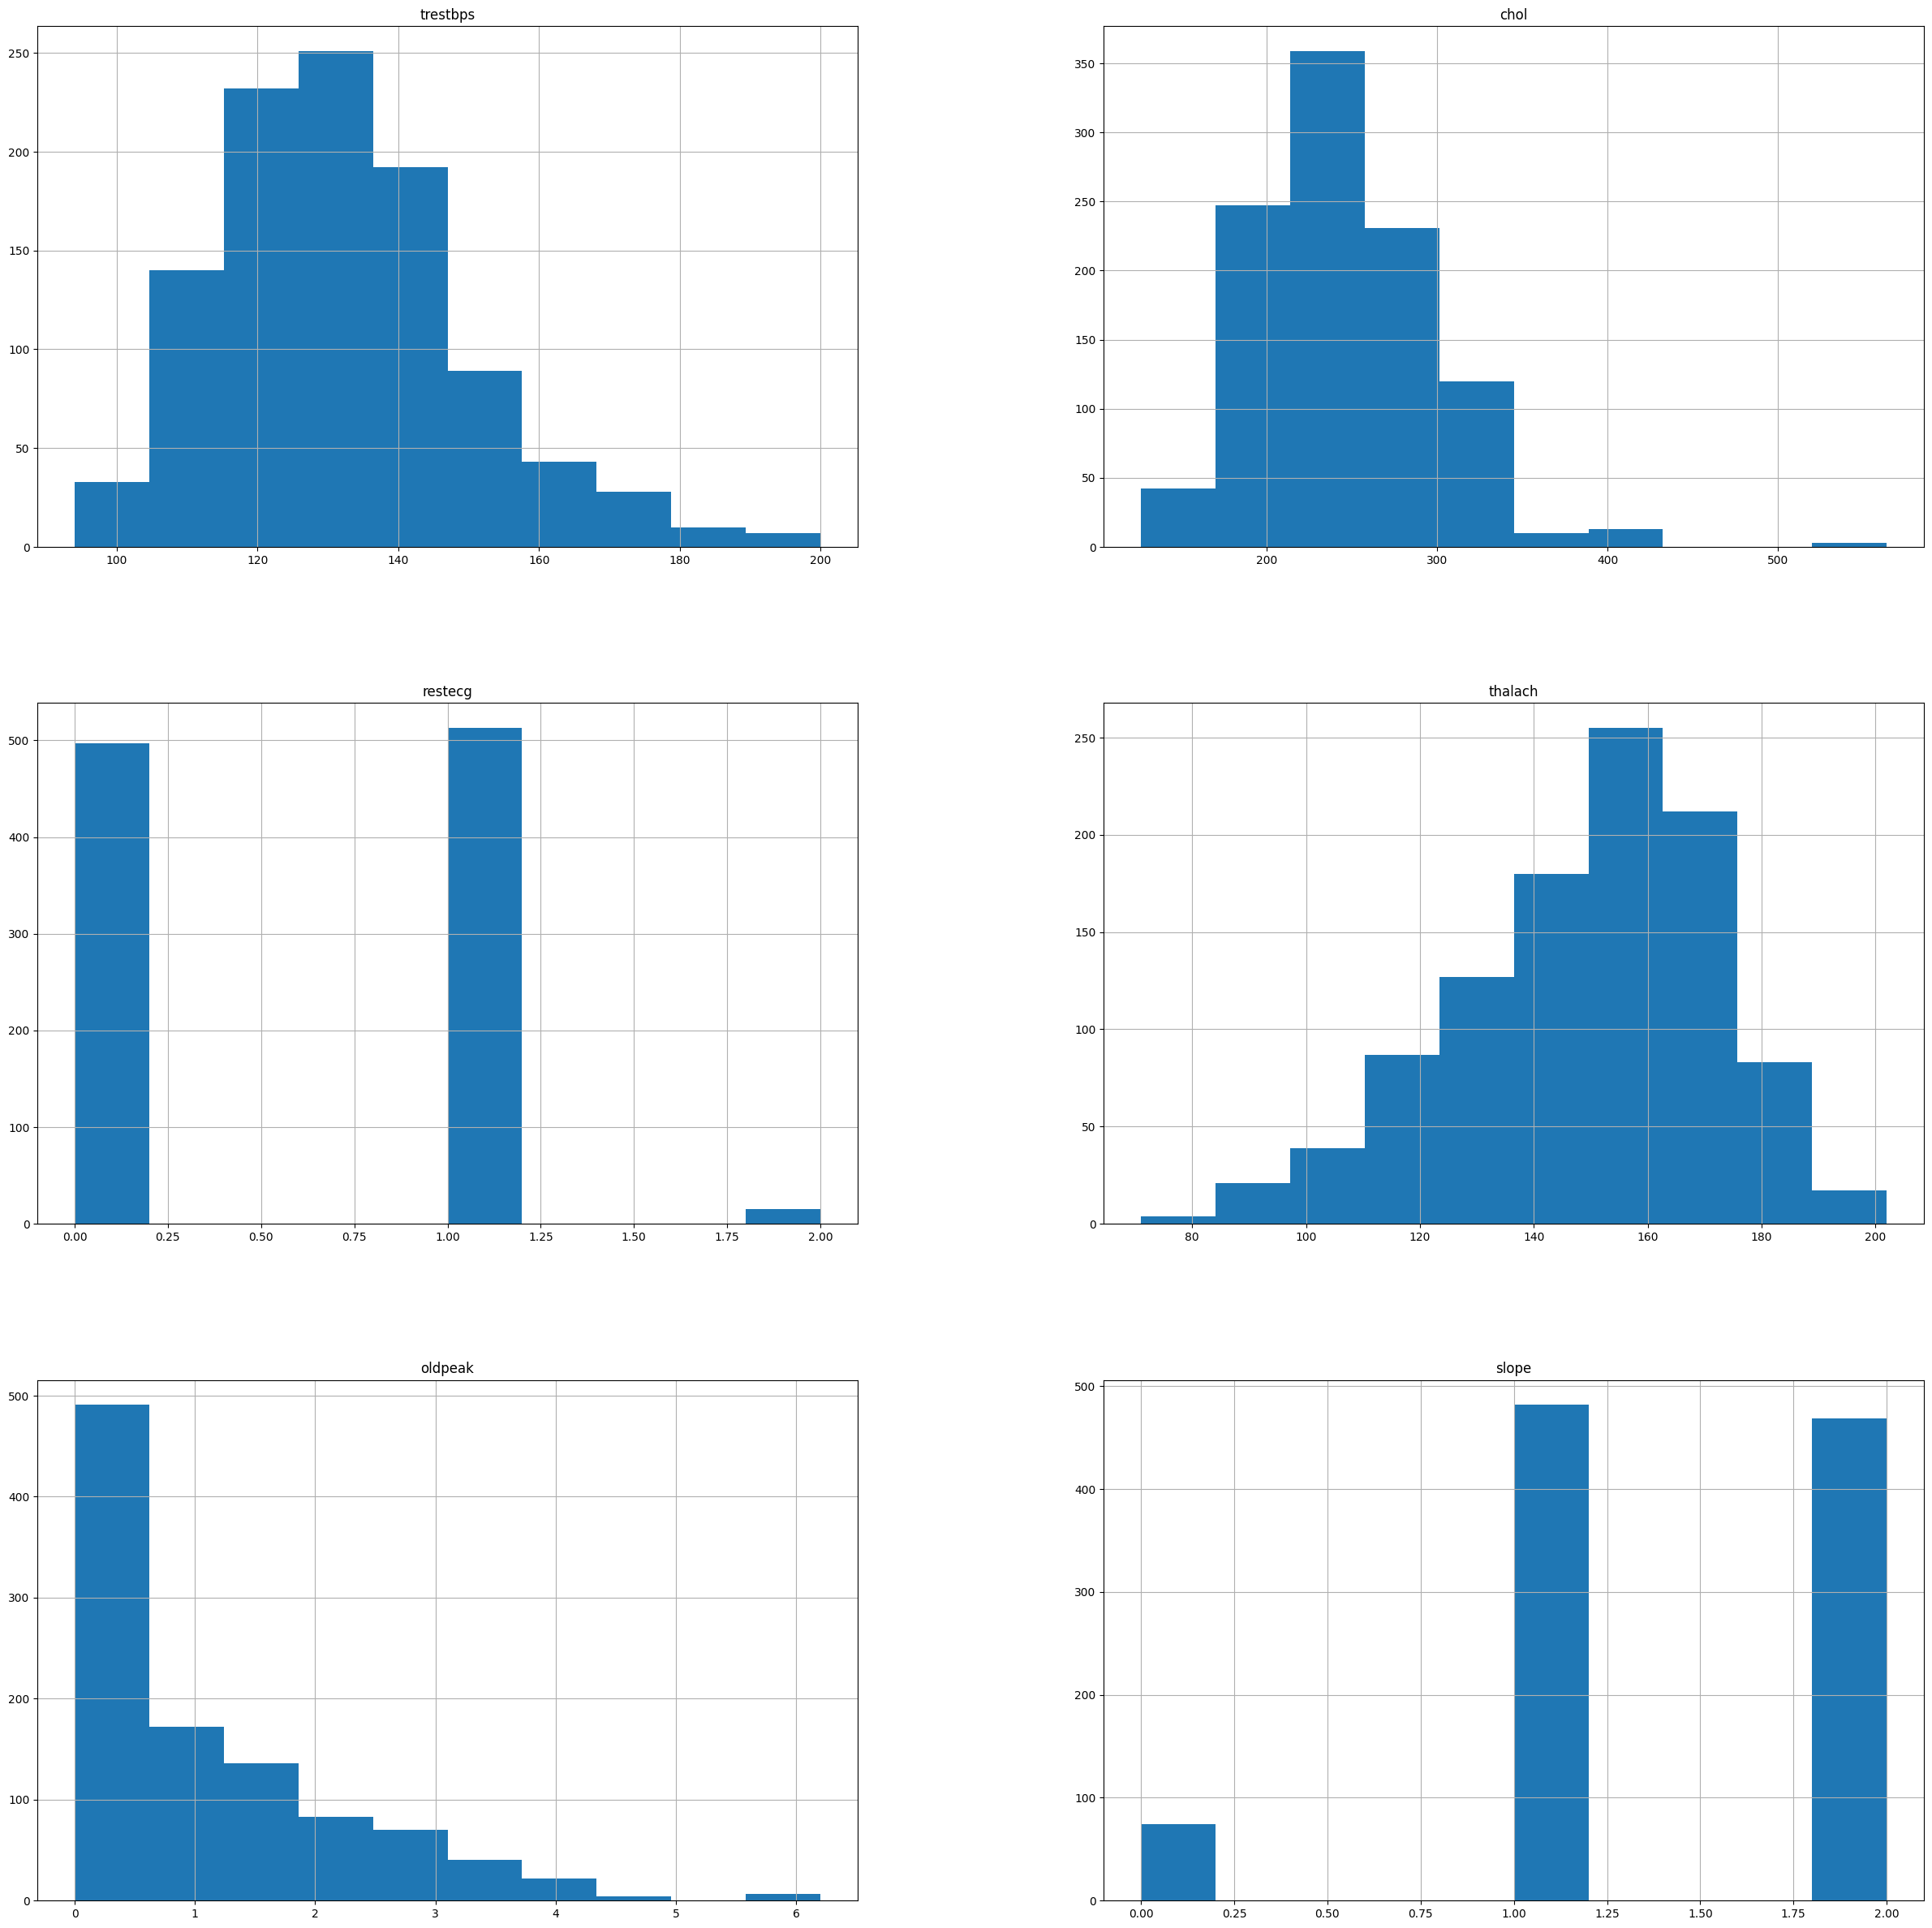

In [ ]:
# visualizing the distribution of the features again

data.hist(figsize=(30,30))

In [ ]:
data.describe()

,trestbps,chol,restecg,thalach,oldpeak,slope
count,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000
mean,131.611707,246.00000,0.529756,149.114146,1.071512,1.385366
std,17.516718,51.59251,0.527878,23.005724,1.175053,0.617755
min,94.000000,126.00000,0.000000,71.000000,0.000000,0.000000
25%,120.000000,211.00000,0.000000,132.000000,0.000000,1.000000
50%,130.000000,240.00000,1.000000,152.000000,0.800000,1.000000
75%,140.000000,275.00000,1.000000,166.000000,1.800000,2.000000
max,200.000000,564.00000,2.000000,202.000000,6.200000,2.000000


In [ ]:
# separating targets and features  

X = data.drop('target', axis=1)
Y = data.target

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size =0.25, stratify=Y, random_state=2)

In [ ]:
#Model Loading and Training 

model = LogisticRegression()
model.fit(X_train, Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

##**Model Evaluation**

In [ ]:
# Accuracy on training data 
X_train_predictions = model.predict(X_train)
training_accuracy = accuracy_score(X_train_predictions,Y_train)
print(training_accuracy)

0.8671875


In [ ]:
# Accuracy on training data 
X_test_predictions = model.predict(X_test)
training_accuracy = accuracy_score(X_test_predictions,Y_test)
print(training_accuracy)

0.7976653696498055


The accuracies did not change

#Train a model using AutoGluon’s Tabular Prediction

In [ ]:
!pip install -U pip
!pip install -U setuptools wheel
!pip install -U "mxnet<2.0.0" bokeh==2.0.1
!pip install autogluon --no-cache-dir

from autogluon.tabular import TabularPredictor


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 16.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 2.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for bokeh: filename=bokeh-2.0.1-py3-none-any.whl size=9080019 sha256=bbb55cf9216a5e07cb3af99f2912dd314e1ea060be61c241eabbf2bac16cc0bb
  Stored in directory: /root/.cache/pip/wheels/be/b4/d8/7ce778fd6e637bea03a561223a77ba6649aff8168e3c613754
Successfully built bokeh
  Attempting uninstall: graphviz
    Found existing installation: graphviz 0.20.1
    Uninstalling graphviz-0.20.1:
      Successfully uninstalled graphviz-0.20.1
  Attempting uninstall: bokeh
    Found existing installat

In [ ]:
# Creates a train: 0.8 | test: 0.2 ratio dataset
data_train, data_test = train_test_split(data, test_size=0.2, random_state=0)

In [ ]:
predictor = TabularPredictor(label="target", eval_metric="root_mean_squared_error").fit(train_data=data_train,time_limit= 600, presets= "best_quality" )

No path specified. Models will be saved in: "AutogluonModels/ag-20230516_110205/"
Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=0, num_bag_folds=8, num_bag_sets=20
Beginning AutoGluon training ... Time limit = 600s
AutoGluon will save models to "AutogluonModels/ag-20230516_110205/"
AutoGluon Version:  0.7.0
Python Version:     3.10.11
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP Sat Apr 29 09:15:28 UTC 2023
Train Data Rows:    820
Train Data Columns: 13
Label Column: target
Preprocessing data ...
AutoGluon infers your prediction problem is: 'binary' (because only two unique label-values observed).
	2 unique label values:  [1, 0]
	If 'binary' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Selected class <--> label mapping:  class 1 = 1, class 0 = 0
Using Feature Generat

Reviewing the highest ranking models

In [48]:
predictor.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                      model  score_val  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0     ExtraTreesGini_BAG_L1  -0.000000       0.223787    0.836041                0.223787           0.836041            1       True          8
1     ExtraTreesEntr_BAG_L1  -0.000000       0.224828    1.070815                0.224828           1.070815            1       True          9
2       WeightedEnsemble_L2  -0.000000       0.231672    2.299599                0.007885           1.463558            2       True         13
3   RandomForestGini_BAG_L1  -0.034922       0.210737    1.110998                0.210737           1.110998            1       True          5
4   RandomForestEntr_BAG_L1  -0.034922       0.211089    1.109684                0.211089           1.109684            1       True          6
5           LightGBM_BAG_L1  -0.060486       0.095548   31.002773         

/usr/local/lib/python3.10/dist-packages/autogluon/core/utils/plots.py:138: UserWarning: AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"
  warnings.warn('AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"')


{'model_types': {'KNeighborsUnif_BAG_L1': 'StackerEnsembleModel_KNN',
  'KNeighborsDist_BAG_L1': 'StackerEnsembleModel_KNN',
  'LightGBMXT_BAG_L1': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1': 'StackerEnsembleModel_LGB',
  'RandomForestGini_BAG_L1': 'StackerEnsembleModel_RF',
  'RandomForestEntr_BAG_L1': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L1': 'StackerEnsembleModel_CatBoost',
  'ExtraTreesGini_BAG_L1': 'StackerEnsembleModel_XT',
  'ExtraTreesEntr_BAG_L1': 'StackerEnsembleModel_XT',
  'XGBoost_BAG_L1': 'StackerEnsembleModel_XGBoost',
  'NeuralNetTorch_BAG_L1': 'StackerEnsembleModel_TabularNeuralNetTorch',
  'LightGBMLarge_BAG_L1': 'StackerEnsembleModel_LGB',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel'},
 'model_performance': {'KNeighborsUnif_BAG_L1': -0.5565573623275283,
  'KNeighborsDist_BAG_L1': -0.11043152607484655,
  'LightGBMXT_BAG_L1': -0.06984302957695782,
  'LightGBM_BAG_L1': -0.06048583789091339,
  'RandomForestGini_BAG_L1': -0.03492151478847891,
  'RandomFores

Best trained model

In [56]:
predictor.leaderboard(data_train, silent=True)

,model,score_test,score_val,pred_time_test,pred_time_val,fit_time,pred_time_test_marginal,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,KNeighborsDist_BAG_L1,-0.000000,-0.110432,0.044399,0.008180,0.006721,0.044399,0.008180,0.006721,1,True,2
1,LightGBMLarge_BAG_L1,-0.000000,-0.060486,0.230669,0.096074,37.933103,0.230669,0.096074,37.933103,1,True,12
2,ExtraTreesGini_BAG_L1,-0.000000,-0.000000,0.335059,0.223787,0.836041,0.335059,0.223787,0.836041,1,True,8
3,WeightedEnsemble_L2,-0.000000,-0.000000,0.338950,0.231672,2.299599,0.003890,0.007885,1.463558,2,True,13
4,RandomForestEntr_BAG_L1,-0.000000,-0.034922,0.351066,0.211089,1.109684,0.351066,0.211089,1.109684,1,True,6
5,ExtraTreesEntr_BAG_L1,-0.000000,-0.000000,0.454706,0.224828,1.070815,0.454706,0.224828,1.070815,1,True,9
6,RandomForestGini_BAG_L1,-0.000000,-0.034922,0.480689,0.210737,1.110998,0.480689,0.210737,1.110998,1,True,5
7,NeuralNetTorch_BAG_L1,-0.000000,-0.069843,0.675357,0.276549,70.417161,0.675357,0.276549,70.417161,1,True,11
8,XGBoost_BAG_L1,-0.000000,-0.060486,0.711869,0.168583,27.425686,0.711869,0.168583,27.425686,1,True,10
9,LightGBM_BAG_L1,-0.000000,-0.060486,0.724930,0.095548,31.002773,0.724930,0.095548,31.002773,1,True,4


In [51]:
test_X = data_test.drop('target', axis=1)
test_Y = data_test.target

Using the best Model for prediction

In [58]:
predictor.predict(test_X, model='KNeighborsDist_BAG_L1')

807    1
27     0
77     0
406    1
886    0
      ..
877    1
320    1
362    1
452    0
500    1
Name: target, Length: 205, dtype: object

In [60]:
TabularPredictor.evaluate(data=data_test,
                          model=None, 
                          silent=False, 
                          auxiliary_metrics=True, 
                          detailed_report=False)

TypeError: ignored